In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.shape

(50553, 12)

# Explore the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


### From the above list, we can see that there are 12 features, which include 5 numerical columns and 7 categorical columns. The dataset is of 50,553 samples, in which the Gender column has 14,600 samples, from that we understand that the Gender column have the large amount of missing values.

# Features description:

### ID : customer ID
### Agency: name of agency 
### Agency Type: type of travel agency
### Distribution Channel: distribution channel of travel insurance agencies 
### Product Name: name of the insurance plan
### Claim: if the insurance is claimed or not(0-not claimed, 1-claimed)
### Duration: duration of the travel (days)
### Destination: destination of travel
### Net Sales: amount of sales of travel insurance policies
### Commision (in value): commission received for travel insurance agency
### Gender: gender of insurance buyer
### Age: age of the insurance buyer

------------------------------------------------------------------------------------------------------------------------------------------------

1. ID is an unique value,so we can drop the ID column.

In [6]:
df.drop("ID", axis = 1, inplace = True)

2. Summary statistics for the numerical attributes in the dataset

In [7]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


3. Taking an initial overview of the dataset, there seems to be some observations:<br>

Age: The maximum Age is 118, which is highly unlikely to travel in that age and have insurance for travelling.<br>
Duration: Trips cannot be lower than 0 as time cannot be negative.<br>
Net Sales: Insurance price values can't be negative.<br>
Commission: Commission values cannot be higher than insurance prices as commission must be worth less than the insurance price.<br>

3.1  Looking at the agencies

In [8]:
df["Agency"].value_counts(dropna = False)

EPX    28002
CWT     6840
C2B     6631
JZI     5059
SSI      839
JWT      606
RAB      571
LWC      548
TST      421
KML      317
ART      272
CCR      158
CBH       81
TTW       77
CSR       68
ADM       63
Name: Agency, dtype: int64

3.2 Looking at the different products that the travel insurance company offers 

In [9]:
df["Product Name"].value_counts(dropna = False)

Cancellation Plan                       14872
2 way Comprehensive Plan                10482
Rental Vehicle Excess Insurance          6840
Basic Plan                               4376
Bronze Plan                              3246
1 way Comprehensive Plan                 2648
Value Plan                               2169
Silver Plan                              1789
Annual Silver Plan                       1156
Ticket Protector                          839
Travel Cruise Protect                     421
Comprehensive Plan                        293
Gold Plan                                 292
24 Protect                                199
Single Trip Travel Protect Gold           159
Premier Plan                              158
Annual Gold Plan                          148
Single Trip Travel Protect Silver         133
Annual Travel Protect Gold                 81
Annual Travel Protect Silver               73
Individual Comprehensive Plan              58
Single Trip Travel Protect Platinu

3.3 Looking at the destinations

In [10]:
df["Destination"].value_counts(dropna = False)

SINGAPORE                    10608
MALAYSIA                      4747
THAILAND                      4699
CHINA                         3836
AUSTRALIA                     2934
                             ...  
IRAN, ISLAMIC REPUBLIC OF        2
NORTHERN MARIANA ISLANDS         1
CAYMAN ISLANDS                   1
TURKMENISTAN                     1
BHUTAN                           1
Name: Destination, Length: 102, dtype: int64

3.4  To see how balanced our target variable is


In [11]:
df["Claim"].value_counts(dropna = False)

0    49812
1      741
Name: Claim, dtype: int64

# Visualising the Data

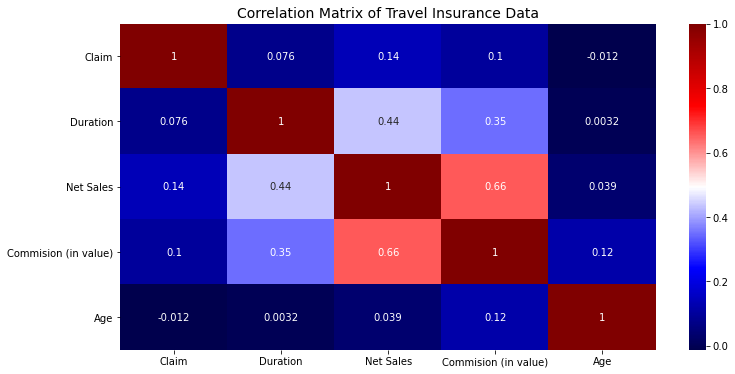

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='seismic');

# formatting axis labels
plt.title("Correlation Matrix of Travel Insurance Data", fontsize=14);

From the above, we can say that there is no high correlation between any of the features.

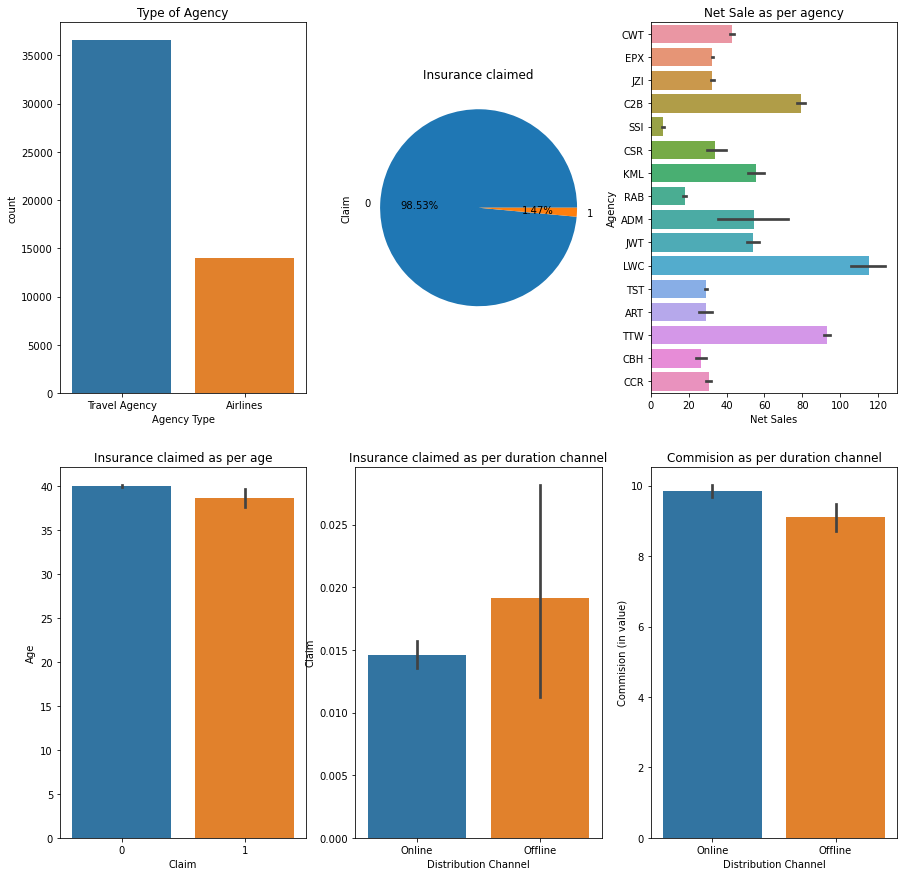

In [13]:
plt.figure(figsize=(15,15))

plt.subplot2grid((2,3),(0,0))
sns.countplot(data=df,x="Agency Type")
plt.title("Type of Agency")

plt.subplot2grid((2,3),(0,1))
catdata=['Claim']
# pandas plot pie plot 
for i in catdata:
    df[i].value_counts().plot.pie(autopct="%1.2f%%")
    plt.title("Insurance claimed", )


plt.subplot2grid((2,3),(0,2))
sns.barplot(x="Net Sales",y='Agency',data=df)
plt.title("Net Sale as per agency" )


plt.subplot2grid((2,3),(1,0))
sns.barplot(x="Claim",y='Age',data=df)
plt.title("Insurance claimed as per age" )


plt.subplot2grid((2,3),(1,1))
sns.barplot(x='Distribution Channel',y="Claim",data=df)
plt.title("Insurance claimed as per duration channel" )


plt.subplot2grid((2,3),(1,2))
sns.barplot(x="Distribution Channel",y='Commision (in value)',data=df)
plt.title("Commision as per duration channel" )

plt.show()

Finding the agencies with the  amount of claims


Text(0.5, 1.0, 'Distribution of Claims in Agencies')

<Figure size 1440x1080 with 0 Axes>

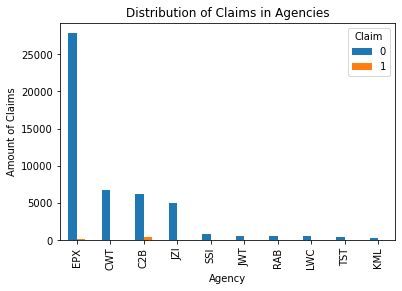

In [18]:

agencies=pd.crosstab(df["Agency"],df["Claim"])

# look at the top 10 agencies with the most claims
top_agencies=(agencies.sort_values(by=[0],ascending=False)).head(10)

# formatting the axes and labels

top_agencies.plot(kind="bar");
plt.xlabel("Agency"); plt.ylabel("Amount of Claims")
plt.title("Distribution of Claims in Agencies")

# we can clearly see that there are claims made for the agency EPX and C2B.

Destination<br>
Here, we want to see if destination stands out as having more claims in one country compared to other countries.

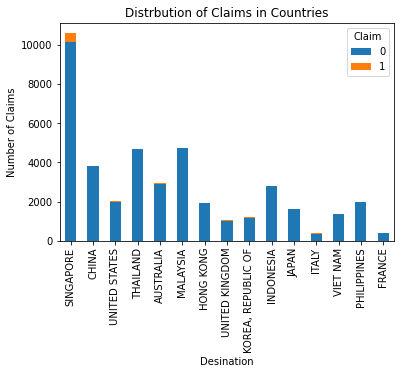

In [ ]:
# looking at the top destinations that have the most claims

destinations=pd.crosstab(df["Destination"],df["Claim"])

# let's look at the top 15 destinations with the most claims
top_destinations=(destinations.sort_values(by=[1],ascending=False)).head(15)

# formatting the axes and labels
top_destinations.plot.bar(stacked=True)
plt.legend(title='Claim')
plt.xlabel("Desination"); plt.ylabel("Number of Claims")
plt.title("Distrbution of Claims in Countries")

# show the graph
plt.show()

AGE<br>
boxplot to see the distribution of age on claims

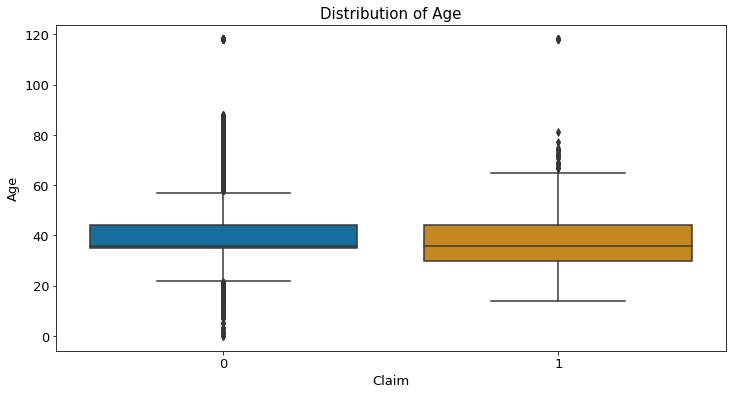

In [ ]:
# enlarging the graph
plt.figure(figsize = (12, 6));


a = sns.boxplot(y='Age', x='Claim',data=df,palette="colorblind");

# The box plot represents the distribution of ages for each "Yes" or "No" claim

# changing graph title
a.axes.set_title("Distribution of Age",fontsize=15);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

# adding axes labels
a.set_ylabel("Age",fontsize=13);
a.set_xlabel("Claim",fontsize=13);

# we can clearly see that there is an outlier here of age 118

# Prepare the Data

## 1.Data Cleaning

***Gender***

In [ ]:
# Checking the weightage of null values.

(df['Gender'].isnull().sum()/df.shape[0]*100).round(2)

71.12

From the above, it's clear that more then 70% of the data have missing values in the Gender column and there are no other features that will help us find out whether the individual is male or female. Therefore, we decided to drop the feature.

In [ ]:
# drop the 'Gender' column since there are too many missing values 
df.drop(['Gender'], axis=1, inplace=True)

Renaming the columns (removing the column space)

In [ ]:
df.rename(columns={'Agency Type':'Agency_Type','Distribution Channel':'Distribution_Channel',
                         'Product Name':'Product_Name','Net Sales':'Net_Sales',
                         'Commision (in value)':'Commision'},inplace=True)
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


***Net Sales & Commision***<br>
Intuitavely, it doesn't make sense to have Net Sales values that are below 0.

In [ ]:
# check if there are any net sales values that are below 0
df[df['Net_Sales']<0].Net_Sales.count()

528

In [ ]:
# net sales values below 0 could be miscoded
# changing negative net sales values to positive values 

df['Net_Sales'] = df['Net_Sales'].abs()

In [ ]:
# it doesn't make sense for Net Sales to be smaller than Commission as commission is usually represented by a function of net sales.
# check how many net sales values are smaller than commission

df[df['Net_Sales']<df['Commision']]

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
19,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,140,SPAIN,0.0,23.76,31
53,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,28,NORWAY,0.0,41.58,58
192,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,307,NEW ZEALAND,0.0,47.52,55
207,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,166,ICELAND,0.0,65.34,42
...,...,...,...,...,...,...,...,...,...,...
50306,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,29,AUSTRALIA,0.0,65.34,30
50371,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,5,UNITED KINGDOM,0.0,5.94,31
50456,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,36,UNITED KINGDOM,0.0,166.32,46
50460,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,14,THAILAND,0.0,11.88,50


In [ ]:
# to fix this, we will fill Net Sales with 0 value with 0 commision

df.loc[df['Net_Sales']<=0]=df['Commision'].min()

In [ ]:
# to check there are no values of commission that are above net sales
len(df[df['Net_Sales']<df['Commision']])

0

***Duration***


In [ ]:
# the skewness of the duration values is important as time can't be negative.
# checking the amount of duration values which are negative
df[(df['Duration'] <= 0)].Duration.count()

1545

In [ ]:
# checking the amount of duration values below 0 is coming from majority class 0

df[(df['Duration'] <= 0) & (df['Claim'] == 0)].count()

Agency                  1545
Agency_Type             1545
Distribution_Channel    1545
Product_Name            1545
Claim                   1545
Duration                1545
Destination             1545
Net_Sales               1545
Commision               1545
Age                     1545
dtype: int64

In [ ]:
# as the majority of the Duration <0 is in the majority claim, we can drop these samples
# removing all values where Duration is below 0

# get names of indexes for rows where Duration has value <= 0
index_names = df[(df['Duration'] <= 0)].index 
  
# drop these given rows 
df.drop(index_names, inplace = True)

In [ ]:
# check if all the values containing duration <0 have been removed

df[df['Duration']<=0].count()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision               0
Age                     0
dtype: int64

***Age***

In [ ]:
# impossible to give insurance to a person over age of 100.
# checking the amount of age values above 100 

df[df['Age'] >= 100].Age.count()

757

In [ ]:
# get names of indexes for rows where Age >=100
index_names = df[(df['Age'] >= 100)].index 
  
# drop these given rows 
df.drop(index_names, inplace = True)

In [ ]:
# check the amount of variables we have after cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48251 entries, 1 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48251 non-null  object 
 1   Agency_Type           48251 non-null  object 
 2   Distribution_Channel  48251 non-null  object 
 3   Product_Name          48251 non-null  object 
 4   Claim                 48251 non-null  int64  
 5   Duration              48251 non-null  int64  
 6   Destination           48251 non-null  object 
 7   Net_Sales             48251 non-null  float64
 8   Commision             48251 non-null  float64
 9   Age                   48251 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


#  Feature Encoding

It is important for all the values in the dataset to be numerical so that the machine learning models can run. To encode the categoorical features, we use the pandas get_dummies method to transform the categorical features into dummy variables.

In [ ]:
# impute one hot encoding for the columns: "Agency", "Agency_Type", "Distribution_Channel", "Product name" and "Destination"
# creating dummies for categorical columns
df_new = pd.get_dummies(df,columns=['Agency', 'Agency_Type', 'Distribution_Channel', "Product_Name", "Destination"])
df_new.head()

,Claim,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,...,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
1,0,85,69.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,11,19.8,11.88,75,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16,20.0,0.00,32,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,15.0,0.00,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,64,49.5,29.70,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# to check that there is now no categorical data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48251 entries, 1 to 50552
Columns: 151 entries, Claim to Destination_ZAMBIA
dtypes: float64(2), int64(3), uint8(146)
memory usage: 8.9 MB


# Train-Test Data¶

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split dataset between features and target
Y =df_new['Claim']
X = df_new.drop(['Claim'], axis=1)

# split the data into 70% training data and 30% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

In [ ]:
# to see what the training set looks like
X_train.head()

,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,Product_Name_Rental Vehicle Excess Insurance,...,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
13270,366,216.00,54.00,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33840,45,50.00,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12500,71,67.00,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33736,24,102.05,25.51,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38218,368,323.40,210.21,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# to see what the testing set looks like
X_test.head()

,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,Product_Name_Rental Vehicle Excess Insurance,...,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
41140,11,44.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3570,21,19.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39328,21,12.0,0.0,32,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20815,6,22.0,7.7,33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44246,55,22.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# to see the split and size of samples in both training and testing sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(33775, 150) (14476, 150) (33775,) (14476,)


# Feature Scaling

In [ ]:
# import standard standardisation to scale the data
from sklearn.preprocessing import StandardScaler

# using the standard scaler
scale = StandardScaler()

# fit on train data
X_train = scale.fit_transform(X_train)

# transform on test data
X_test=scale.transform(X_test)


# Imbalance Issue<br>
There are 3 methods which can be used to deal with the problem of imbalanced classification and improve the class distribution:<br>

1.Under Sampling <br>
2.Over Sampling<br>
3.SMOTE<br>


#  Under Sampling

In [ ]:
# import resample - Under sample
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
Counter(Y_train)

# use Random Under sampling
US = RandomUnderSampler(random_state = 42, sampling_strategy = 1.0) 

# fit the under sampling to training data
X_train_US, Y_train_US = US.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_US.shape, Y_train_US.shape)

(1024, 150) (1024,)


In [ ]:
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_US)))

The number of classes before fit Counter({0: 33263, 1: 512})
The number of classes after fit Counter({0: 512, 1: 512})


# Over Sampling

In [ ]:
# import resample - Over sample
from imblearn.over_sampling import RandomOverSampler

# use Random Over sampling
OS = RandomOverSampler() 

# fit the over sampling to the training data
X_train_OS, Y_train_OS = OS.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_OS.shape, Y_train_OS.shape)

(66526, 150) (66526,)


In [ ]:
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_OS)))

The number of classes before fit Counter({0: 33263, 1: 512})
The number of classes after fit Counter({0: 33263, 1: 33263})


# SMOTE

In [ ]:
# import SMOTE 
import six
import imblearn
from imblearn.over_sampling import SMOTE

# use SMOTE to equalize both the classes
sm = SMOTE(random_state = 25, sampling_strategy = 1.0) 

# fit the sampling
X_train_SMOTE, Y_train_SMOTE = sm.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_SMOTE.shape, Y_train_SMOTE.shape)

(66526, 150) (66526,)


In [ ]:
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_SMOTE)))

The number of classes before fit Counter({0: 33263, 1: 512})
The number of classes after fit Counter({0: 33263, 1: 33263})


#Model Building


Due to the imbalanced nature of the dataset, we will focus on looking at the F1 and Recall scores as our key metric to assess the model performance. We avoid looking at the accuracy metric as it is useless, since a dataset can have high accuracy and perform worse than a dataset with a lower accuracy. Therefore, looking at the accuracy score would be misleading.

We now test our models under each of our training sets from undersampling, oversampling and SMOTE.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Training and testing data with Under Sampling

1. Logistic Regression

In [ ]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_US = LogisticRegression(random_state = 42, max_iter = 200)
lr_US.fit(X_train_US, Y_train_US)
y_pred = lr_US.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     14256
           1       0.05      0.78      0.09       220

    accuracy                           0.77     14476
   macro avg       0.52      0.77      0.48     14476
weighted avg       0.98      0.77      0.85     14476

---------------------------------------------------------------------------------------------------
accuracy 76.65791655153357
precision 4.910077076791321
recall 78.18181818181819
f1 9.239860327692721


2. Random Forest

In [ ]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_US = RandomForestClassifier(random_state=42)
rfc_US.fit(X_train_US, Y_train_US)
y_pred = rfc_US.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('----------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)


              precision    recall  f1-score   support

           0       0.99      0.75      0.85     14256
           1       0.04      0.71      0.08       220

    accuracy                           0.75     14476
   macro avg       0.52      0.73      0.47     14476
weighted avg       0.98      0.75      0.84     14476

----------------------------------------------------------------------------------------------------------------------
accuracy 74.75131251726997
precision 4.1633306645316255
recall 70.9090909090909
f1 7.864885303755987


3. Decision Tree

In [ ]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_US = DecisionTreeClassifier(random_state = 42)
dtc_US.fit(X_train_US, Y_train_US)
y_pred = dtc_US.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       0.99      0.65      0.79     14256
           1       0.03      0.67      0.06       220

    accuracy                           0.65     14476
   macro avg       0.51      0.66      0.42     14476
weighted avg       0.98      0.65      0.78     14476

------------------------------------------------
accuracy 65.34263608731695
precision 2.9059493422344396
recall 67.27272727272727
f1 5.571240353849049


4. xgboosting

In [ ]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_US = XGBClassifier(random_state = 42)

xgbc_US.fit(X_train_US, Y_train_US)
y_pred = xgbc_US.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       0.99      0.78      0.87     14256
           1       0.05      0.74      0.09       220

    accuracy                           0.78     14476
   macro avg       0.52      0.76      0.48     14476
weighted avg       0.98      0.78      0.86     14476

------------------------------------------------
accuracy 77.77701022381873
precision 4.905206139030996
recall 74.0909090909091
f1 9.201241885407848


`5.SVM

In [ ]:
from sklearn.svm import LinearSVC
# HARD MARGIN
lin=LinearSVC(random_state=42)
lin.fit(X_train_US, Y_train_US)
y_pred = lin.predict(X_test)
print(classification_report(Y_test,y_pred))

print('----------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     14256
           1       0.05      0.76      0.09       220

    accuracy                           0.78     14476
   macro avg       0.52      0.77      0.48     14476
weighted avg       0.98      0.78      0.86     14476

----------------------------------------------------------------------------------------------------------------------------------------------
accuracy 77.77010223818735
precision 5.012004801920768
recall 75.9090909090909
f1 9.403153153153154


In [ ]:
# SOFT MARGIN
lin2=LinearSVC(C=0.4,random_state=42)
lin2.fit(X_train_US, Y_train_US)
y_pred2 = lin2.predict(X_test)
print(classification_report(Y_test,y_pred))
print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     14256
           1       0.05      0.76      0.09       220

    accuracy                           0.78     14476
   macro avg       0.52      0.77      0.48     14476
weighted avg       0.98      0.78      0.86     14476

------------------------------------------------
accuracy 77.77010223818735
precision 5.012004801920768
recall 75.9090909090909
f1 9.403153153153154


5.2.SVM POLY

In [ ]:
# IMPORTING SVC FROM sklearn
from sklearn.svm import SVC
svc = SVC(random_state=42,kernel="poly")
svc.fit(X_train_US, Y_train_US)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14256
           1       0.06      0.70      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.76      0.50     14476
weighted avg       0.98      0.82      0.89     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 81.92870958828405
precision 5.695266272189349
recall 70.0
f1 10.533515731874145


5.3 SVM RBF

In [ ]:
# IMPORTING SVC FROM sklearn
from sklearn.svm import SVC
svc = SVC(random_state=42,kernel="rbf")
svc.fit(X_train_US, Y_train_US)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14256
           1       0.05      0.71      0.09       220

    accuracy                           0.79     14476
   macro avg       0.52      0.75      0.49     14476
weighted avg       0.98      0.79      0.87     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 78.97899972368057
precision 5.0047816385081285
recall 71.36363636363636
f1 9.353589514447423


# Training and testing Data with Over Sampling

1. Logistic Regression

In [ ]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_OS = LogisticRegression(random_state = 42, max_iter = 100)

lr_OS.fit(X_train_OS, Y_train_OS)
y_pred = lr_OS.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       1.00      0.80      0.89     14256
           1       0.06      0.75      0.10       220

    accuracy                           0.80     14476
   macro avg       0.53      0.78      0.50     14476
weighted avg       0.98      0.80      0.88     14476

---------------------------------------------------------------------------------------------------
accuracy 80.22243713733076
precision 5.549949545913218
recall 75.0
f1 10.335108048856874


2. Random Forest Classifier

In [ ]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_OS = RandomForestClassifier(random_state=42, bootstrap= True,  max_depth= 16)
# define the classifier model
rfc_OS = RandomForestClassifier(random_state=42)
rfc_OS.fit(X_train_OS, Y_train_OS)
y_pred = rfc_OS.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('----------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14256
           1       0.06      0.04      0.05       220

    accuracy                           0.98     14476
   macro avg       0.52      0.51      0.52     14476
weighted avg       0.97      0.98      0.97     14476

----------------------------------------------------------------------------------------------------------------------
accuracy 97.66510085659021
precision 5.970149253731343
recall 3.6363636363636362
f1 4.519774011299435


3.Decision Tree

In [ ]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_OS = DecisionTreeClassifier(random_state = 42)
dtc_OS.fit(X_train_OS, Y_train_OS)
y_pred = dtc_OS.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('-------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14256
           1       0.05      0.06      0.06       220

    accuracy                           0.97     14476
   macro avg       0.52      0.52      0.52     14476
weighted avg       0.97      0.97      0.97     14476

-------------------------------------------------------------------------------------------------------------------------------
accuracy 96.7946946670351
precision 5.147058823529411
recall 6.363636363636363
f1 5.691056910569105


4.xgboosting

In [ ]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_OS = XGBClassifier(random_state = 42)
xgbc_OS.fit(X_train_OS, Y_train_OS)
y_pred = xgbc_OS.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14256
           1       0.06      0.70      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.76      0.51     14476
weighted avg       0.98      0.82      0.89     14476

------------------------------------------------
accuracy 82.42608455374413
precision 5.851063829787234
recall 70.0
f1 10.799438990182326


5. SVM

In [ ]:
# HARD MARGIN
lin=LinearSVC(random_state=50)
lin.fit(X_train_OS, Y_train_OS)
y_pred = lin.predict(X_test)
print(classification_report(Y_test,y_pred))
print('----------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     14256
           1       0.06      0.74      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.78      0.50     14476
weighted avg       0.98      0.82      0.89     14476

----------------------------------------------------------------------------------------------------------------------------------------------
accuracy 81.58331030671457
precision 5.88023088023088
recall 74.0909090909091
f1 10.895721925133689


In [ ]:
# SOFT MARGIN
lin2=LinearSVC(C=0.4,random_state=42)
lin2.fit(X_train_OS, Y_train_OS)
y_pred2 = lin2.predict(X_test)
print(classification_report(Y_test,y_pred))
print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     14256
           1       0.06      0.74      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.78      0.50     14476
weighted avg       0.98      0.82      0.89     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 81.58331030671457
precision 5.88023088023088
recall 74.0909090909091
f1 10.895721925133689


5.2 SVM POLY

In [ ]:
# IMPORTING SVC FROM sklearn
from sklearn.svm import SVC
svc = SVC(random_state=42,kernel="poly")
svc.fit(X_train_OS, Y_train_OS)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14256
           1       0.06      0.72      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.77      0.50     14476
weighted avg       0.98      0.82      0.89     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 81.74219397623654
precision 5.800802626778548
recall 72.27272727272728
f1 10.739614994934144


5.3 SVM RBF

In [117]:
# IMPORTING SVC FROM sklearn
from sklearn.svm import SVC
svc = SVC(random_state=42,kernel="rbf")
svc.fit(X_train_OS, Y_train_OS)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     14256
           1       0.05      0.75      0.10       220

    accuracy                           0.79     14476
   macro avg       0.52      0.77      0.49     14476
weighted avg       0.98      0.79      0.87     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 78.68886432716221
precision 5.192367844854552
recall 75.45454545454545
f1 9.716125256072578


# Training and test Data with SMOTE

1.Logistic Regression

In [118]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_SMOTE = LogisticRegression(random_state = 42, max_iter = 400)
lr_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = lr_SMOTE.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('-------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)



              precision    recall  f1-score   support

           0       1.00      0.77      0.87     14256
           1       0.05      0.77      0.09       220

    accuracy                           0.77     14476
   macro avg       0.52      0.77      0.48     14476
weighted avg       0.98      0.77      0.86     14476

-------------------------------------------------------------------------------------------------------------------------------------------
accuracy 77.26581928709588
precision 4.983875696276751
recall 77.27272727272727
f1 9.363811622142661


2. RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_SMOTE = RandomForestClassifier(random_state=42, bootstrap= True,  max_depth= 16) # adding random_state=42 to make this notebook's output constant
rfc_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = rfc_SMOTE.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14256
           1       0.07      0.48      0.12       220

    accuracy                           0.89     14476
   macro avg       0.53      0.69      0.53     14476
weighted avg       0.98      0.89      0.93     14476

---------------------------------------------------------------------------------------------------
accuracy 89.38933407018513
precision 6.8807339449541285
recall 47.72727272727273
f1 12.027491408934706


3. Decision tree

In [120]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_SMOTE = DecisionTreeClassifier(random_state = 42)
dtc_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = dtc_SMOTE.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     14256
           1       0.04      0.10      0.06       220

    accuracy                           0.95     14476
   macro avg       0.51      0.53      0.52     14476
weighted avg       0.97      0.95      0.96     14476

---------------------------------------------------------------------------------------------------
accuracy 94.78447084830064
precision 3.9586919104991396
recall 10.454545454545453
f1 5.742821473158552


4. xgboost

In [121]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_SMOTE = XGBClassifier(random_state=42)
xgbc_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = xgbc_OS.predict(X_test)
# results tesing score
print(classification_report(Y_test,y_pred))

print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14256
           1       0.06      0.70      0.11       220

    accuracy                           0.82     14476
   macro avg       0.53      0.76      0.51     14476
weighted avg       0.98      0.82      0.89     14476

------------------------------------------------
accuracy 82.42608455374413
precision 5.851063829787234
recall 70.0
f1 10.799438990182326


5. SVM

In [122]:
#HARD SAMPLING
lin=LinearSVC(random_state=50)
lin.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = lin.predict(X_test)
print(classification_report(Y_test,y_pred))
print('------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14256
           1       0.05      0.72      0.10       220

    accuracy                           0.81     14476
   macro avg       0.52      0.76      0.50     14476
weighted avg       0.98      0.81      0.88     14476

------------------------------------------------
accuracy 80.78198397347333
precision 5.489923558026407
recall 71.81818181818181
f1 10.200129115558424


In [123]:
# SOFT MARGIN
lin2=LinearSVC(C=0.4,random_state=42)
lin2.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred2 = lin2.predict(X_test)
print(classification_report(Y_test,y_pred))
print('----------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14256
           1       0.05      0.72      0.10       220

    accuracy                           0.81     14476
   macro avg       0.52      0.76      0.50     14476
weighted avg       0.98      0.81      0.88     14476

----------------------------------------------------------------------------------------------------------------------------------------------
accuracy 80.78198397347333
precision 5.489923558026407
recall 71.81818181818181
f1 10.200129115558424


5.1 SVM POLY

In [124]:
# IMPORTING SVC FROM sklearn
from sklearn.svm import SVC
svc = SVC(random_state=42,kernel="poly")
svc.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14256
           1       0.06      0.69      0.11       220

    accuracy                           0.83     14476
   macro avg       0.53      0.76      0.51     14476
weighted avg       0.98      0.83      0.89     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 82.7162199502625
precision 5.877803557617943
recall 69.0909090909091
f1 10.833927298645758


5.2 SVM RBF

In [125]:
svc = SVC(random_state=42,kernel="rbf")
svc.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = svc.predict(X_test)
print(classification_report(Y_test,y_pred))

print('---------------------------------------------------------------------------------------------------------------------------------------------')
print("accuracy", accuracy_score(Y_test,y_pred)*100)
print("precision", precision_score(Y_test,y_pred)*100)
print("recall", recall_score(Y_test,y_pred)*100)
print("f1",f1_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     14256
           1       0.05      0.72      0.10       220

    accuracy                           0.80     14476
   macro avg       0.52      0.76      0.49     14476
weighted avg       0.98      0.80      0.87     14476

---------------------------------------------------------------------------------------------------------------------------------------------
accuracy 79.81486598507875
precision 5.264900662251656
recall 72.27272727272728
f1 9.814814814814815


# MODEL PERFORMANCE

### 1. UNDER SAMPLING

In [19]:
model = ['Logistic Regression','Random Forest','Decision Tree','XGBoost','SVM', 'SVM POLY','SVM RBF']
Recall = [78.18,74.75,67.27,74.09,75.90,70.0,71.30]
Accuracy = [76.65,70.09,65.34,77.77,77.77,81.92,78.97]

df_complete_test = pd.DataFrame({'Model':model,'Recall Score Test': Recall,"Accuracy score":Accuracy})

df_complete_test
df_complete_test.to_csv('undersampling.csv')

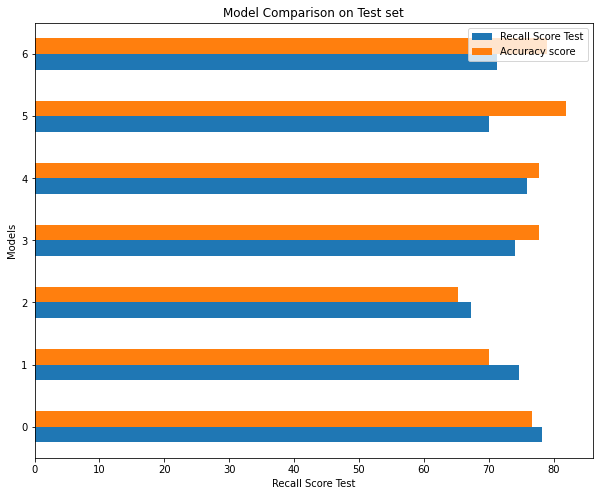

In [133]:
ax = df_complete_test.plot.barh(figsize=(10,8));
ax.set(xlabel="Recall Score Test", ylabel="Models", title='Model Comparison on Test set');

### 2. OVER SAMPLING

In [20]:
model = ['Logistic Regression','Random Forest','Decision Tree','XGBoost','SVM', 'SVM POLY','SVM RBF']
Recall = [75.0,3.36,6.36,70.0,74.09,72.27,75.45]
Accuracy = [80.22,97.66,96.76,82.42,81.58,81.74,78.68]

df_complete_test = pd.DataFrame({'Model':model,'Rcall Score Test': Recall,"Accuracy score":Accuracy})

df_complete_test
df_complete_test.to_csv('oversampling.csv')

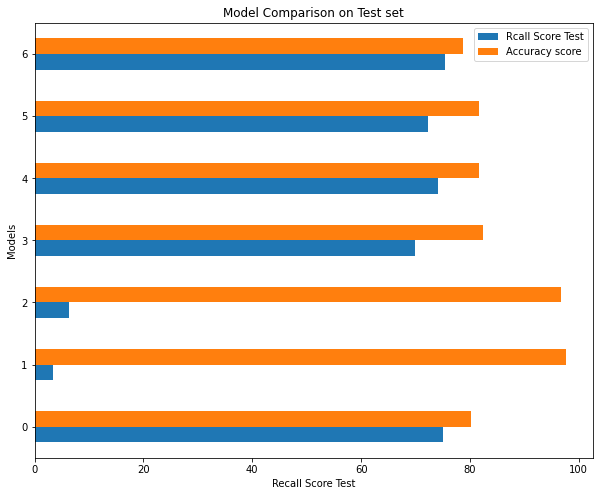

In [135]:
ax = df_complete_test.plot.barh(figsize=(10,8));
ax.set(xlabel="Recall Score Test", ylabel="Models", title='Model Comparison on Test set');

### 3. SMOTE

In [21]:
model = ['Logistic Regression','Random Forest','Decision Tree','XGBoost','SVM', 'SVM POLY','SVM RBF']
Recall = [77.27,47.27,10.45,70.0,71.81,69.0,72.27]
Accuracy = [77.77,89.38,94.74,82.42,80.78,82.71,79.81]

df_complete_test = pd.DataFrame({'Model':model,'Rcall Score Test': Recall,"Accuracy score":Accuracy})

df_complete_test
df_complete_test.to_csv('SMOTEsampling.csv')

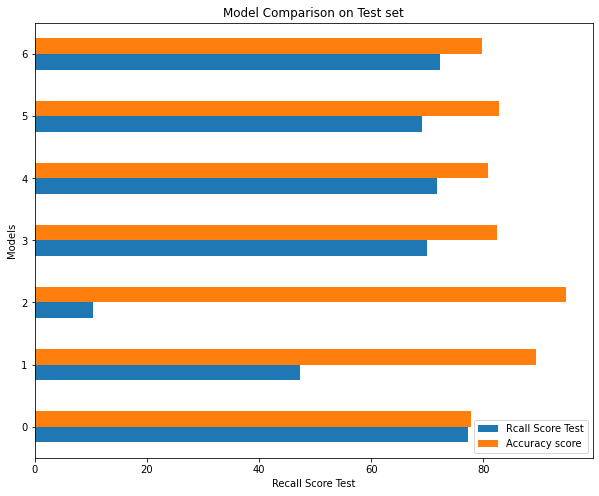

In [137]:
ax = df_complete_test.plot.barh(figsize=(10,8));
ax.set(xlabel="Recall Score Test", ylabel="Models", title='Model Comparison on Test set');